## Assignment 1 - Time Series Forecasting (using Weather_data.csv)

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime as dt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Weather_data.csv",skipinitialspace=True)
df.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [3]:
df.shape

(98913, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98913 entries, 0 to 98912
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   datetime_utc  98913 non-null  object 
 1   _conds        98845 non-null  object 
 2   _dewptm       98294 non-null  float64
 3   _fog          98913 non-null  int64  
 4   _hail         98913 non-null  int64  
 5   _heatindexm   29111 non-null  float64
 6   _hum          98160 non-null  float64
 7   _precipm      0 non-null      float64
 8   _pressurem    98682 non-null  float64
 9   _rain         98913 non-null  int64  
 10  _snow         98913 non-null  int64  
 11  _tempm        98244 non-null  float64
 12  _thunder      98913 non-null  int64  
 13  _tornado      98913 non-null  int64  
 14  _vism         94497 non-null  float64
 15  _wdird        84533 non-null  float64
 16  _wdire        84533 non-null  object 
 17  _wgustm       1063 non-null   float64
 18  _windchillm   573 non-null

In [5]:
df.isnull().sum()

datetime_utc        0
_conds             68
_dewptm           619
_fog                0
_hail               0
_heatindexm     69802
_hum              753
_precipm        98913
_pressurem        231
_rain               0
_snow               0
_tempm            669
_thunder            0
_tornado            0
_vism            4416
_wdird          14380
_wdire          14380
_wgustm         97850
_windchillm     98340
_wspdm           2353
dtype: int64

In [6]:
df = df.dropna(axis = 'columns', how = 'all')
df

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98908,20161130-12:30,Mist,17.0,0,0,NaN,78.0,1015.0,0,0,21.0,0,0,1.5,0.0,North,NaN,NaN,0.0
98909,20161130-13:00,Mist,16.0,0,0,NaN,83.0,1015.0,0,0,19.0,0,0,1.2,0.0,North,NaN,NaN,0.0
98910,20161130-15:00,Patches of Fog,16.0,1,0,NaN,90.0,1016.0,0,0,17.0,0,0,1.0,NaN,NaN,NaN,NaN,0.0
98911,20161130-18:00,Patches of Fog,14.0,1,0,NaN,96.0,1017.0,0,0,15.0,0,0,1.0,NaN,NaN,NaN,NaN,0.0


In [7]:
df.shape

(98913, 19)

In [8]:
half_count = len(df)/2
df = df.dropna(thresh=half_count,axis=1)
df.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,27.0,1010.0,0,0,30.0,0,0,5.0,280.0,West,7.4
1,19961101-12:00,Smoke,10.0,0,0,32.0,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN
2,19961101-13:00,Smoke,11.0,0,0,44.0,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN
3,19961101-14:00,Smoke,10.0,0,0,41.0,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN
4,19961101-16:00,Smoke,11.0,0,0,47.0,1011.0,0,0,23.0,0,0,1.2,0.0,North,0.0


In [9]:
print(df.shape)
df.isnull().sum()

(98913, 16)


datetime_utc        0
_conds             68
_dewptm           619
_fog                0
_hail               0
_hum              753
_pressurem        231
_rain               0
_snow               0
_tempm            669
_thunder            0
_tornado            0
_vism            4416
_wdird          14380
_wdire          14380
_wspdm           2353
dtype: int64

In [10]:
df['datetime_utc'] = pd.to_datetime(df['datetime_utc'])
df = df.set_index('datetime_utc')
df.head()

,_conds,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wspdm
datetime_utc,,,,,,,,,,,,,,,
1996-11-01 11:00:00,Smoke,9.0,0,0,27.0,1010.0,0,0,30.0,0,0,5.0,280.0,West,7.4
1996-11-01 12:00:00,Smoke,10.0,0,0,32.0,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN
1996-11-01 13:00:00,Smoke,11.0,0,0,44.0,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN
1996-11-01 14:00:00,Smoke,10.0,0,0,41.0,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN
1996-11-01 16:00:00,Smoke,11.0,0,0,47.0,1011.0,0,0,23.0,0,0,1.2,0.0,North,0.0


In [11]:
# rename columns
new_cols = [x.replace('_','') for x in df.columns]
df.columns = new_cols

In [12]:
df.columns

Index(['conds', 'dewptm', 'fog', 'hail', 'hum', 'pressurem', 'rain', 'snow',
       'tempm', 'thunder', 'tornado', 'vism', 'wdird', 'wdire', 'wspdm'],
      dtype='object')

In [13]:
df.fillna(method='ffill',inplace=True)

In [14]:
df.isnull().sum()

conds        0
dewptm       0
fog          0
hail         0
hum          0
pressurem    0
rain         0
snow         0
tempm        0
thunder      0
tornado      0
vism         0
wdird        0
wdire        0
wspdm        0
dtype: int64

In [15]:
df["conds"].value_counts()

Haze                             46924
Smoke                            20338
Mist                              9012
Clear                             3129
Widespread Dust                   2836
Fog                               2541
Scattered Clouds                  2197
Partly Cloudy                     2064
Shallow Fog                       1859
Mostly Cloudy                     1520
Light Rain                        1297
Partial Fog                        966
Patches of Fog                     820
Thunderstorms and Rain             471
Light Drizzle                      410
Heavy Fog                          407
Rain                               394
Unknown                            378
Blowing Sand                       358
Overcast                           313
Thunderstorm                       190
Light Thunderstorms and Rain       170
Drizzle                            111
Light Thunderstorm                  63
Light Fog                           52
Heavy Rain               

In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
columns=(['conds','wdire'])
for col in columns:
    df[col] = le.fit_transform(df[col])

In [17]:
df.head()

,conds,dewptm,fog,hail,hum,pressurem,rain,snow,tempm,thunder,tornado,vism,wdird,wdire,wspdm
datetime_utc,,,,,,,,,,,,,,,
1996-11-01 11:00:00,31,9.0,0,0,27.0,1010.0,0,0,30.0,0,0,5.0,280.0,16,7.4
1996-11-01 12:00:00,31,10.0,0,0,32.0,-9999.0,0,0,28.0,0,0,5.0,0.0,7,7.4
1996-11-01 13:00:00,31,11.0,0,0,44.0,-9999.0,0,0,24.0,0,0,5.0,0.0,7,7.4
1996-11-01 14:00:00,31,10.0,0,0,41.0,1010.0,0,0,24.0,0,0,2.0,0.0,7,7.4
1996-11-01 16:00:00,31,11.0,0,0,47.0,1011.0,0,0,23.0,0,0,1.2,0.0,7,0.0


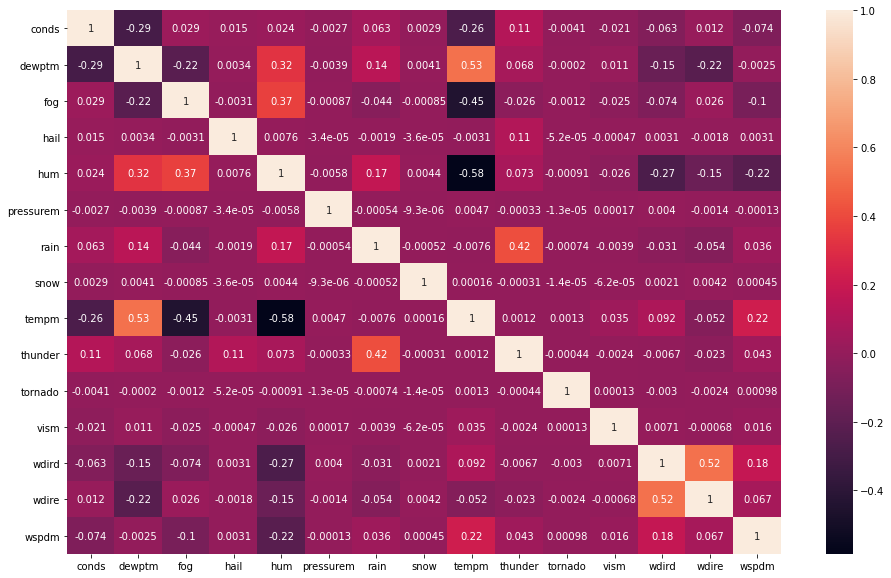

In [18]:
#Check Correlation between Columns 
correlation = df.corr() 
fig, ax = plt.subplots(figsize=(16,10)) 
ax = sns.heatmap(correlation ,annot = True)

In [19]:
print("most important features relative to target")
correlation.sort_values(['tempm'], ascending=False, inplace=True)
correlation.tempm

most important features relative to target


tempm        1.000000
dewptm       0.526783
wspdm        0.220101
wdird        0.091767
vism         0.034727
pressurem    0.004704
tornado      0.001293
thunder      0.001229
snow         0.000163
hail        -0.003055
rain        -0.007564
wdire       -0.052428
conds       -0.263406
fog         -0.447231
hum         -0.584771
Name: tempm, dtype: float64

In [20]:
X=df.iloc[:,[0,1,2,3,4,5,6,7,9,10,11,12,13,14]].values
Y=df.iloc[:,8].values

In [21]:
Y

array([30., 28., 24., ..., 17., 15., 14.])

In [22]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,Y)

LinearRegression()

In [23]:
#Checking the accuracy
lr.score(X,Y)

0.9161650272559051

In [24]:
y_pred = lr.predict(X)
y_pred

array([28.22212777, 27.93220006, 25.19592827, ..., 17.48222598,
       13.69848348, 11.25030855])

In [25]:
from sklearn.metrics import mean_squared_error
from math import sqrt

mean_squared_error(Y,y_pred)

rmse = sqrt(mean_squared_error(Y, y_pred))

from sklearn.metrics import r2_score
r2 = r2_score(Y, y_pred)

adj_r2 = 1 - float(len(Y)-1)/(len(Y)-len(lr.coef_)-1)*(1 - r2)

rmse, r2, adj_r2, lr.coef_, lr.intercept_

(2.4524981716412295,
 0.9161650272559051,
 0.9161531595779094,
 array([-5.20544382e-03,  9.66242675e-01,  1.81650226e+00,  9.63229498e-01,
        -3.08542872e-01,  7.99967002e-08,  1.45545862e+00,  1.96297643e+00,
        -1.71100572e-01,  1.20079822e+00,  1.45195738e-03, -1.66866199e-03,
         1.99778552e-02,  2.63178138e-02]),
 27.96345725919058)

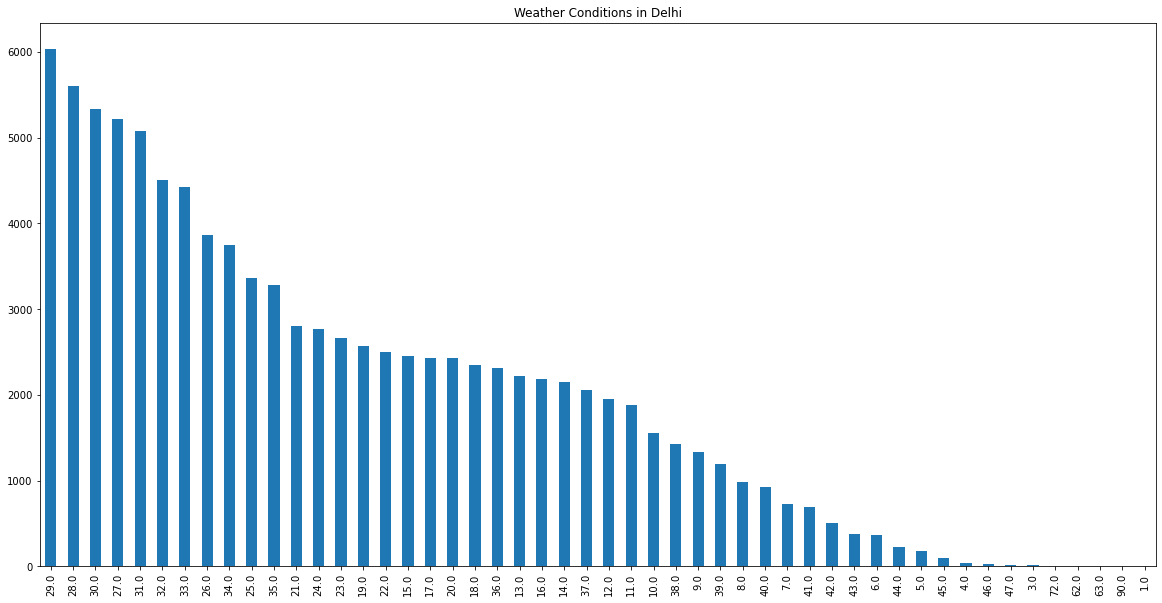

In [26]:
# temperature Frequency
plt.figure(figsize=(20, 10));
df.tempm.value_counts().head(50).plot(kind='bar');
plt.title("Weather Conditions in Delhi")
plt.plot();
# most common temp is 29 degree C